In [1]:
!pip uninstall -y screenpro2
# !pip install git+https://github.com/ArcInstitute/screenpro2.git@dev
!pip install ScreenPro2

Found existing installation: ScreenPro2 0.4.14
Uninstalling ScreenPro2-0.4.14:
  Successfully uninstalled ScreenPro2-0.4.14


In [2]:
from glob import glob

import numpy as np
import pandas as pd 
import anndata as ad
import scanpy as sc

import screenpro as scp

import matplotlib.pyplot as plt

sc.settings.set_figure_params(
    dpi=150, format='svg', 
    frameon=False, 
    figsize=(3, 3), 
    color_map='RdGy', 
    facecolor='white', 
    vector_friendly=True
)

In [3]:
import datetime

import matplotlib
import matplotlib.ticker as ticker

from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import font_manager as fm
from matplotlib import rcParams, rc_context

from screenpro.plotting._utils import almost_black, dark2


matplotlib.use('cairo')

font_files = fm.findSystemFonts(fontpaths='/home/abea/miniconda3/envs/screenpro2/fonts/', fontext='ttf')

for font_file in font_files:
    fm.fontManager.addfont(font_file)


# {f.name for f in matplotlib.font_manager.fontManager.ttflist}

rcParams['font.sans-serif'] = 'Helvetica'
rcParams['font.family'] = ['Helvetica']
rcParams['figure.dpi'] = 140

rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

In [4]:
# help(scp.phenoScore.getPhenotypeScore)

# help(scp.pl.plotReplicateScatter)

## Step 1: FASTQ processing


In [5]:
meta = pd.read_csv('A549_PRDX1_CRISPRi_v3_samplesheet.txt', index_col=0)

In [6]:
library_table = pd.read_csv(
    'CRISPRi_v3_human_librarytable.txt.gz',
    sep = '\t', index_col=False, low_memory=False
)

### run `guideCounter`

In [7]:
counter = scp.GuideCounter(cas_type = 'cas9', library_type = 'dual_guide_design')

In [8]:
counter.load_library(
    'CRISPRi_v3_human_librarytable.txt.gz', sep = '\t', index_col=False,
    # 'JR_V3lib_top2_v2.csv', sep = ',', 
    verbose = True,
    low_memory=False
)

Trimming protospacer sequences in 'protospacer_A' column.
Trimming protospacer sequences in 'protospacer_B' column.
Library table successfully loaded.
total # of cas9 sgRNAs: 125721


In [9]:
# samples = [
#     s.split('/')[-1].replace('_R1.fastq.gz','')
#     for s in glob('fastq/*__CRISPRi_v3__*R1.fastq.gz')
# ]
# samples.sort()

samples = meta.index.to_list()

In [10]:
samples

['A549_parent__CRISPRi_v3__T0__rep1',
 'A549_parent__CRISPRi_v3__T0__rep2',
 'A549_parent__CRISPRi_v3__vehicle__rep1',
 'A549_parent__CRISPRi_v3__vehicle__rep2',
 'A549_parent__CRISPRi_v3__vehicle__rep3',
 'A549_parent__CRISPRi_v3__DNAPKi__rep1',
 'A549_parent__CRISPRi_v3__DNAPKi__rep2',
 'A549_parent__CRISPRi_v3__DNAPKi__rep3',
 'A549_PRDX1KO__CRISPRi_v3__T0__rep1',
 'A549_PRDX1KO__CRISPRi_v3__T0__rep2',
 'A549_PRDX1KO__CRISPRi_v3__vehicle__rep1',
 'A549_PRDX1KO__CRISPRi_v3__vehicle__rep2',
 'A549_PRDX1KO__CRISPRi_v3__vehicle__rep3',
 'A549_PRDX1KO__CRISPRi_v3__DNAPKi__rep1',
 'A549_PRDX1KO__CRISPRi_v3__DNAPKi__rep2',
 'A549_PRDX1KO__CRISPRi_v3__DNAPKi__rep3']

In [11]:
counter.get_counts_matrix(
    fastq_dir = 'fastq',
    samples = samples,
    get_recombinant=True,
    # write='force',
    verbose = True
)

A549_parent__CRISPRi_v3__T0__rep1
count file exists ...
% mapped reads 66.34202614968581
% unmapped reads 33.657973850314185
% fully remapped recombination events 26.47737763246664
A549_parent__CRISPRi_v3__T0__rep2
count file exists ...
% mapped reads 66.32218193273496
% unmapped reads 33.67781806726504
% fully remapped recombination events 26.50011577061559
A549_parent__CRISPRi_v3__vehicle__rep1
count file exists ...
% mapped reads 67.20907556484951
% unmapped reads 32.79092443515049
% fully remapped recombination events 25.272198653710067
A549_parent__CRISPRi_v3__vehicle__rep2
count file exists ...
% mapped reads 66.92354310294688
% unmapped reads 33.07645689705313
% fully remapped recombination events 25.37066787477768
A549_parent__CRISPRi_v3__vehicle__rep3
count file exists ...
% mapped reads 67.21893941522036
% unmapped reads 32.78106058477964
% fully remapped recombination events 25.303932753452987
A549_parent__CRISPRi_v3__DNAPKi__rep1
count file exists ...
% mapped reads 67.3616

In [12]:
counter.counts_mat.sum() / 10**6

A549_parent__CRISPRi_v3__T0__rep1          24.148331
A549_parent__CRISPRi_v3__T0__rep2          28.847160
A549_parent__CRISPRi_v3__vehicle__rep1     45.664373
A549_parent__CRISPRi_v3__vehicle__rep2     41.157890
A549_parent__CRISPRi_v3__vehicle__rep3     44.508120
A549_parent__CRISPRi_v3__DNAPKi__rep1      36.048196
A549_parent__CRISPRi_v3__DNAPKi__rep2      40.013010
A549_parent__CRISPRi_v3__DNAPKi__rep3      31.109935
A549_PRDX1KO__CRISPRi_v3__T0__rep1         28.506749
A549_PRDX1KO__CRISPRi_v3__T0__rep2         26.428348
A549_PRDX1KO__CRISPRi_v3__vehicle__rep1    38.351913
A549_PRDX1KO__CRISPRi_v3__vehicle__rep2    39.298149
A549_PRDX1KO__CRISPRi_v3__vehicle__rep3    85.610964
A549_PRDX1KO__CRISPRi_v3__DNAPKi__rep1     30.551431
A549_PRDX1KO__CRISPRi_v3__DNAPKi__rep2     31.217038
A549_PRDX1KO__CRISPRi_v3__DNAPKi__rep3     35.184928
dtype: float64

In [13]:
adata = counter.build_counts_anndata()

In [14]:
adata.obs = pd.DataFrame(
    adata.obs.index.str.split('__').to_list(),
    columns=['cell_line','library','condition','replicate'],
    index=adata.obs.index
).drop(columns=['library'])

adata.obs['pop_doubling'] = meta.loc[adata.obs.index,'pop_doubling'].replace('-',0).astype(float)

adata.obs.cell_line = adata.obs.cell_line.str.replace('A549_','')
adata.obs.replicate = adata.obs.replicate.str.replace('rep','').astype(int)

In [15]:
adata.write_h5ad('A549_PRDX1_CRISPRi_v3.h5ad.gz', compression='gzip')

### load counts and metadata

In [16]:
adata = ad.read_h5ad('A549_PRDX1_CRISPRi_v3.h5ad.gz')

___
<!-- - filter low counts -->

In [17]:
adata0 = adata.copy()

___

In [18]:
adata.obs

,cell_line,condition,replicate,pop_doubling
A549_parent__CRISPRi_v3__T0__rep1,parent,T0,1,0.000000
A549_parent__CRISPRi_v3__T0__rep2,parent,T0,2,0.000000
A549_parent__CRISPRi_v3__vehicle__rep1,parent,vehicle,1,8.099107
A549_parent__CRISPRi_v3__vehicle__rep2,parent,vehicle,2,7.760087
A549_parent__CRISPRi_v3__vehicle__rep3,parent,vehicle,3,7.799925
A549_parent__CRISPRi_v3__DNAPKi__rep1,parent,DNAPKi,1,7.459794
A549_parent__CRISPRi_v3__DNAPKi__rep2,parent,DNAPKi,2,7.541174
A549_parent__CRISPRi_v3__DNAPKi__rep3,parent,DNAPKi,3,7.709747
A549_PRDX1KO__CRISPRi_v3__T0__rep1,PRDX1KO,T0,1,0.000000
A549_PRDX1KO__CRISPRi_v3__T0__rep2,PRDX1KO,T0,2,0.000000


In [19]:
fig1, axes = plt.subplots(ncols=5,
                         figsize=(10,3), 
                         gridspec_kw={'wspace': 0.3, 'left': 0.12,'top':.8,'bottom':.3}, 
                         # sharey=True
                        )

for i,(cond,reps) in enumerate(
    zip(['T0','vehicle','vehicle','DNAPKi','DNAPKi'], 
        [['rep1','rep2'],['rep1','rep2'],['rep1','rep3'],['rep1','rep2'],['rep1','rep3']])
    ):
    scp.pl.plotReplicateScatter(
        axes[i], adata, 
        f'A549_parent__CRISPRi_v3__{cond}__{reps[0]}',
        f'A549_parent__CRISPRi_v3__{cond}__{reps[1]}',
        title=cond,
    min_val=0,max_val=6, log_transform=True)

for ax in axes: 
    ax.tick_params(width=0.5)
    for i in ax.spines.values(): i.set_linewidth(0.5)
    # ax.spines['top'].set_visible(False)
    # ax.spines['right'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)
    # ax.spines['left'].set_visible(False)
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
        item.set_fontsize(8)
    for item in ax.get_xticklabels() + ax.get_yticklabels():
        item.set_fontsize(6)

fig1.suptitle('PRDX1 parent screen',fontsize=12)

plt.show()

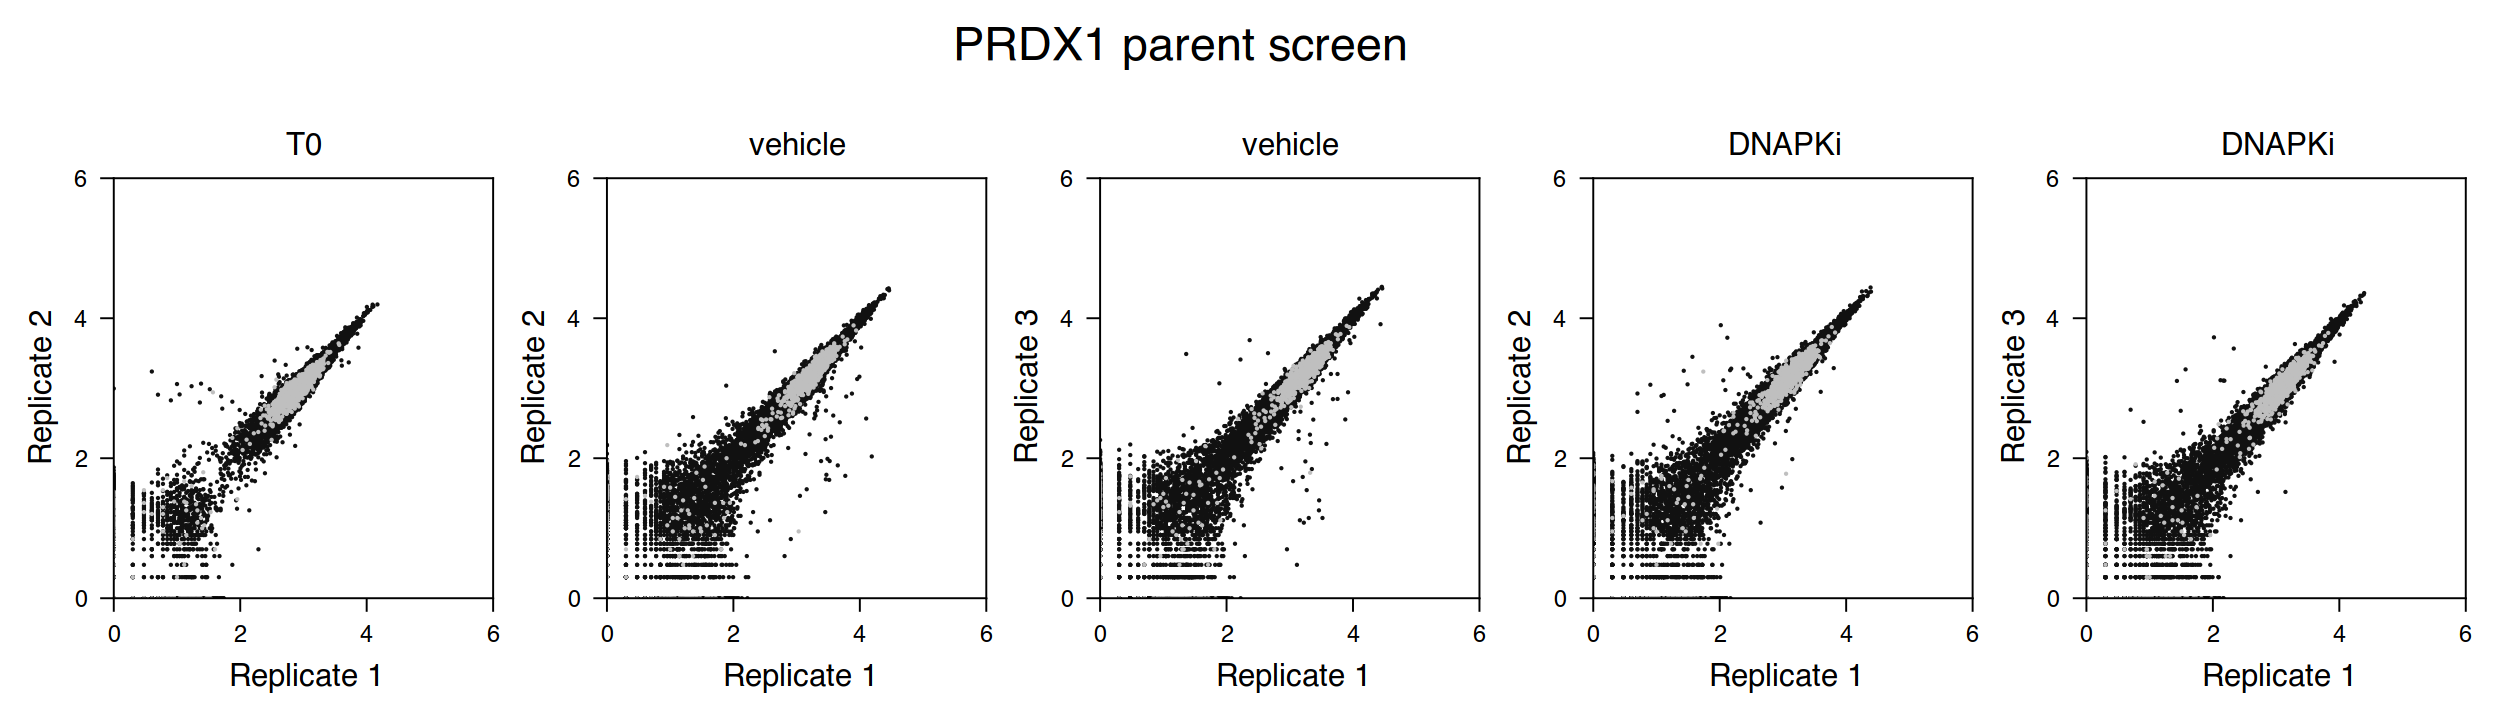

In [20]:
fig1

In [21]:
fig2, axes = plt.subplots(ncols=5,
                         figsize=(10,3), 
                         gridspec_kw={'wspace': 0.3, 'left': 0.12,'top':.8,'bottom':.3}, 
                         # sharey=True
                        )
for i,(cond,reps) in enumerate(
    zip(['T0','vehicle','vehicle','DNAPKi','DNAPKi'], 
        [['rep1','rep2'],['rep1','rep2'],['rep1','rep3'],['rep1','rep2'],['rep1','rep3']])
    ):
    scp.pl.plotReplicateScatter(
        axes[i], adata, 
        f'A549_PRDX1KO__CRISPRi_v3__{cond}__{reps[0]}',
        f'A549_PRDX1KO__CRISPRi_v3__{cond}__{reps[1]}',
        title=cond,
    min_val=0,max_val=6, log_transform=True)


for ax in axes: 
    ax.tick_params(width=0.5)
    for i in ax.spines.values(): i.set_linewidth(0.5)
    # ax.spines['top'].set_visible(False)
    # ax.spines['right'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)
    # ax.spines['left'].set_visible(False)
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
        item.set_fontsize(8)
    for item in ax.get_xticklabels() + ax.get_yticklabels():
        item.set_fontsize(6)

fig2.suptitle('PRDX1 KO screen',fontsize=12)

plt.show()

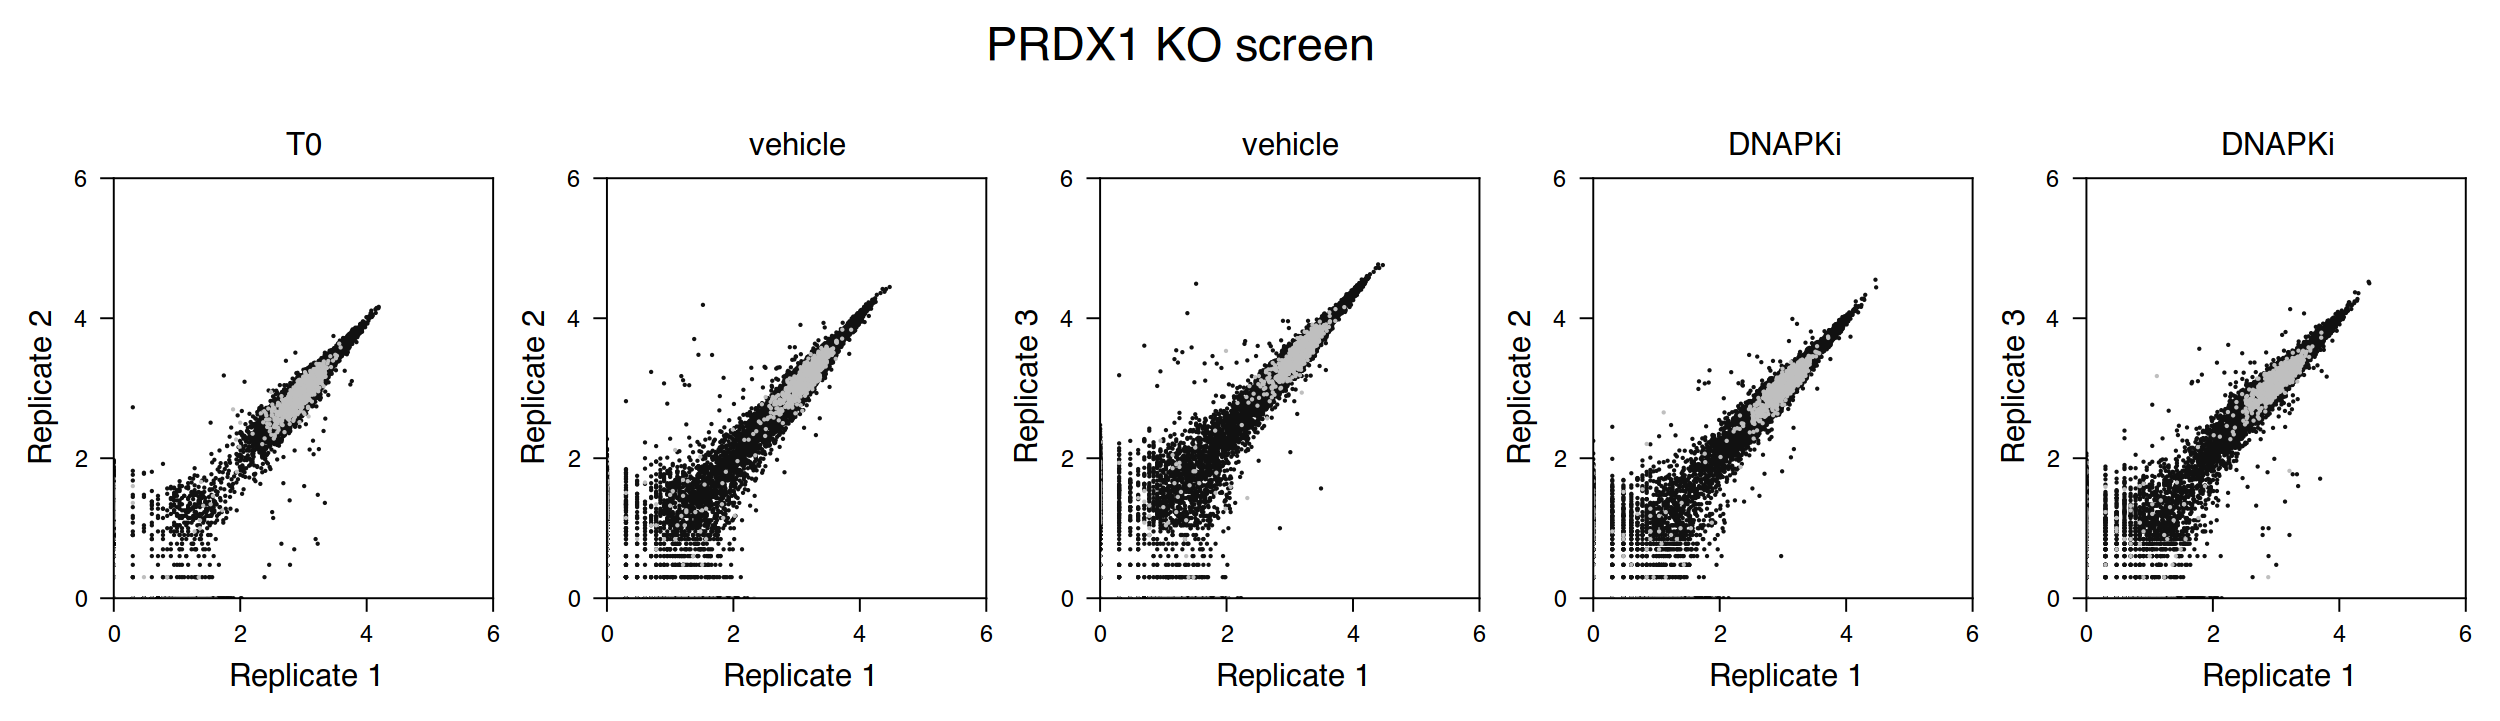

In [22]:
fig2

# Step 2: Phenotype calculation

- [x] 'PRDX1_parent gamma vehicle_vs_T0'
- [x] 'PRDX1_parent rho DNAPKi_vs_vehicle',
- [x] 'PRDX1_parent tau DNAPKi_vs_T0',

- [x] 'PRDX1_KO gamma vehicle_vs_T0',
- [x] 'PRDX1_KO rho DNAPKi_vs_vehicle',
- [x] 'PRDX1_KO tau DNAPKi_vs_T0',

- [x] 'vehicle_PRDX1KO_vs_vehicle_parent'

### load counts and metadata

In [23]:
adata = ad.read_h5ad('A549_PRDX1_CRISPRi_v3.h5ad.gz')

___
<!-- - filter low counts -->

In [24]:
adata0 = adata.copy()

#### Add 3rd pseudoreplicate for T0

In [25]:
# add a 3rd replicate to the parent data as average of the two existing replicates
def add_pseudoreplicate(adata,index_rep1,index_rep2, name_new_replicate=3):
    adata = adata.copy()
    # name index ad pseudoreplicate
    index_pseudorep = f'{index_rep1}_{index_rep2}'
    
    if index_pseudorep in adata.obs.index:
        raise ValueError(f'Pseudoreplicate {index_pseudorep} already exists in the AnnData object.')

    # create a new AnnData object
    adata_pseudorep = ad.AnnData(pd.Series(
        adata[adata.obs.index.isin([index_rep1,index_rep2])].X.mean(axis=0),
        index=adata.var.index,
        name=index_pseudorep
    ).astype(int).to_frame().T)
    # update the metadata
    adata_pseudorep.obs['replicate'] = name_new_replicate
    for key in adata.obs.columns:
        if key not in adata_pseudorep.obs.columns:
            adata_pseudorep.obs[key] = adata.obs[key].loc[index_rep1]

    # add the pseudoreplicate to the original AnnData object
    out = ad.concat([adata, adata_pseudorep])
    out.var = adata.var.copy()

    return out

In [26]:
adata = add_pseudoreplicate(adata,'A549_parent__CRISPRi_v3__T0__rep1','A549_parent__CRISPRi_v3__T0__rep2')

In [27]:
adata = add_pseudoreplicate(adata,'A549_PRDX1KO__CRISPRi_v3__T0__rep1','A549_PRDX1KO__CRISPRi_v3__T0__rep2')

In [28]:
adata.obs

,cell_line,condition,replicate,pop_doubling
A549_parent__CRISPRi_v3__T0__rep1,parent,T0,1,0.000000
A549_parent__CRISPRi_v3__T0__rep2,parent,T0,2,0.000000
A549_parent__CRISPRi_v3__vehicle__rep1,parent,vehicle,1,8.099107
A549_parent__CRISPRi_v3__vehicle__rep2,parent,vehicle,2,7.760087
A549_parent__CRISPRi_v3__vehicle__rep3,parent,vehicle,3,7.799925
A549_parent__CRISPRi_v3__DNAPKi__rep1,parent,DNAPKi,1,7.459794
A549_parent__CRISPRi_v3__DNAPKi__rep2,parent,DNAPKi,2,7.541174
A549_parent__CRISPRi_v3__DNAPKi__rep3,parent,DNAPKi,3,7.709747
A549_PRDX1KO__CRISPRi_v3__T0__rep1,PRDX1KO,T0,1,0.000000
A549_PRDX1KO__CRISPRi_v3__T0__rep2,PRDX1KO,T0,2,0.000000


In [29]:
adata_PRDX1KO = adata[adata.obs['cell_line'].eq('PRDX1KO')].copy()
adata_parent  = adata[adata.obs['cell_line'].eq('parent')].copy()

In [30]:
adata_vehicle = adata[adata.obs['condition'].isin(['T0','vehicle'])].copy()
adata_vehicle = adata_vehicle[~(adata_vehicle.obs['cell_line'].eq('PRDX1KO')&adata_vehicle.obs['condition'].eq('T0'))].copy()
adata_vehicle.obs['condition_original'] = adata_vehicle.obs['condition']
adata_vehicle.obs.loc[adata_vehicle.obs['cell_line'].eq('PRDX1KO'),'condition'] = 'PRDX1KO'
adata_vehicle.obs.loc[adata_vehicle.obs['condition'].eq('vehicle'),'condition'] = 'parent'

In [31]:
def run_pipeline(adata, untreated='vehicle', treated='DNAPKi'):
    
    screen = scp.PooledScreens(adata, verbose=True)
    
    screen.filterLowCounts(minimum_reads=40)
    
    screen.countNormalization()
    
    screen.calculateDrugScreen(
        t0='T0', 
        untreated=untreated, 
        treated=treated, 
        score_level='compare_reps',
        count_filter_type='either'
    )

    screen.buildPhenotypeData()
    
    screen.pdata.obs['replicate'] = screen.pdata.obs.index.str[-1].astype(int)

    return screen


def plot_score_scatters(screen, title, untreated='vehicle', treated='DNAPKi'):
    fig, axes = plt.subplots(ncols=2,
                             figsize=(4.2,3), 
                             gridspec_kw={'wspace': 0.4, 'left': 0.12,'top':.8,'bottom':.3}, 
                             # sharey=True
                            )
    scp.pl.plotReplicateScatter(axes[0], screen.pdata, 
                                f'gamma:{untreated}_vs_T0::replicate_1',
                                f'gamma:{untreated}_vs_T0::replicate_2',
                                title='gamma',
                                 # min_val=-1,max_val=1,
                                 log_transform=False)
    scp.pl.plotReplicateScatter(axes[1], screen.pdata, 
                                f'tau:{treated}_vs_T0::replicate_1',
                                f'tau:{treated}_vs_T0::replicate_2',
                                title='tau',
                                 # min_val=-1,max_val=1,
                                 log_transform=False)
    
    
    for ax in axes: 
        ax.tick_params(width=0.5)
        for i in ax.spines.values(): i.set_linewidth(0.5)
        # ax.spines['top'].set_visible(False)
        # ax.spines['right'].set_visible(False)
        # ax.spines['bottom'].set_visible(False)
        # ax.spines['left'].set_visible(False)
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
            item.set_fontsize(8)
        for item in ax.get_xticklabels() + ax.get_yticklabels():
            item.set_fontsize(6)
        
        # ax.set_xticks(list(map(lambda x: x/10.0, range(-10, 11, 5))))
        # ax.set_xticks(list(map(lambda x: x/10.0, range(-10, 11, 5))))
    
    fig.suptitle(title,fontsize=12)
    
    return fig


def plot_count_norm(screen, title):
    fig,axes = plt.subplots(1,2,sharey=True,figsize=(4.2,3))
    
    # plot count distribution
    np.log10(
        screen.adata.to_df(layer='raw_counts').T+1
    ).plot.hist(bins=100, histtype='step', ax=axes[0])
    
    # plot count distribution
    np.log10(
        screen.adata.to_df().T+1
    ).plot.hist(bins=100, histtype='step', ax=axes[1])
    
    for ax in axes: 
        ax.set_xlabel('log10(counts+1)')
        ax.get_legend().remove()
        ax.grid(False)
        ax.tick_params(width=0.5)
        for i in ax.spines.values(): i.set_linewidth(0.5)
        # ax.spines['top'].set_visible(False)
        # ax.spines['right'].set_visible(False)
        # ax.spines['bottom'].set_visible(False)
        # ax.spines['left'].set_visible(False)
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
            item.set_fontsize(8)
        for item in ax.get_xticklabels() + ax.get_yticklabels():
            item.set_fontsize(6)
        ax.set_yticks(range(0, 1201, 500))
        
    fig.suptitle(f'{title}\n\nSequencing depth normalization',fontsize=12,horizontalalignment='center',y=0.9)

    fig.tight_layout(
        h_pad=1, w_pad=.4,
        # rect=[0, 0.03, 1, 0.99]
    )

    return fig

In [32]:
def plot_volcanos(screen, title, threshold=3, score_names=['gamma','tau','rho']):

    fig, axes = plt.subplots(1,3, figsize=(6, 3), dpi = 300)

    for ax, score_name in zip(axes, screen.listPhenotypeScores()):

        score_tag, _ = score_name.split(':')

        if score_tag in score_names:
            screen.drawVolcano(ax=ax, phenotype_name=score_name, pvalue_col='ttest pvalue', threshold=threshold)
        else:
            ax.set_visible(False)
    
    for ax in axes:
        if ax.get_visible():
            ax.get_legend().remove()
            ax.grid(False)
            ax.tick_params(width=0.5)
            for i in ax.spines.values(): i.set_linewidth(0.5)
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            # ax.spines['bottom'].set_visible(False)
            # ax.spines['left'].set_visible(False)
            for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
                item.set_fontsize(8)
            for item in ax.get_xticklabels() + ax.get_yticklabels():
                item.set_fontsize(6)

    fig.suptitle(title, fontsize=12,horizontalalignment='center',y=0.9)
    fig.tight_layout(
        h_pad=1, w_pad=.4,
        # rect=[0, 0.03, 1, 0.99]
    ) # left, bottom, right, top

    return fig

### PRDX1 parent screen

In [33]:
screen_parent = run_pipeline(adata_parent)

44326 variables with less than 40 reads (filter_type: 'all')
Pseudocount added to counts.
Counts normalized by sequencing depth.
	vehicle vs T0
	DNAPKi vs T0
	DNAPKi vs vehicle


In [34]:
screen_parent.listPhenotypeScores()

['gamma:vehicle_vs_T0', 'tau:DNAPKi_vs_T0', 'rho:DNAPKi_vs_vehicle']

In [35]:
# rho = screen_parent.phenotypes['compare_reps']['results']['rho:DNAPKi_vs_vehicle']

# screen_parent.adata[:,rho[rho.isna().any(axis=1)].index].to_df()

#### replicate level scores

In [36]:
fig3 = plot_score_scatters(
    screen_parent, 
    title='PRDX1 parent screen'
)

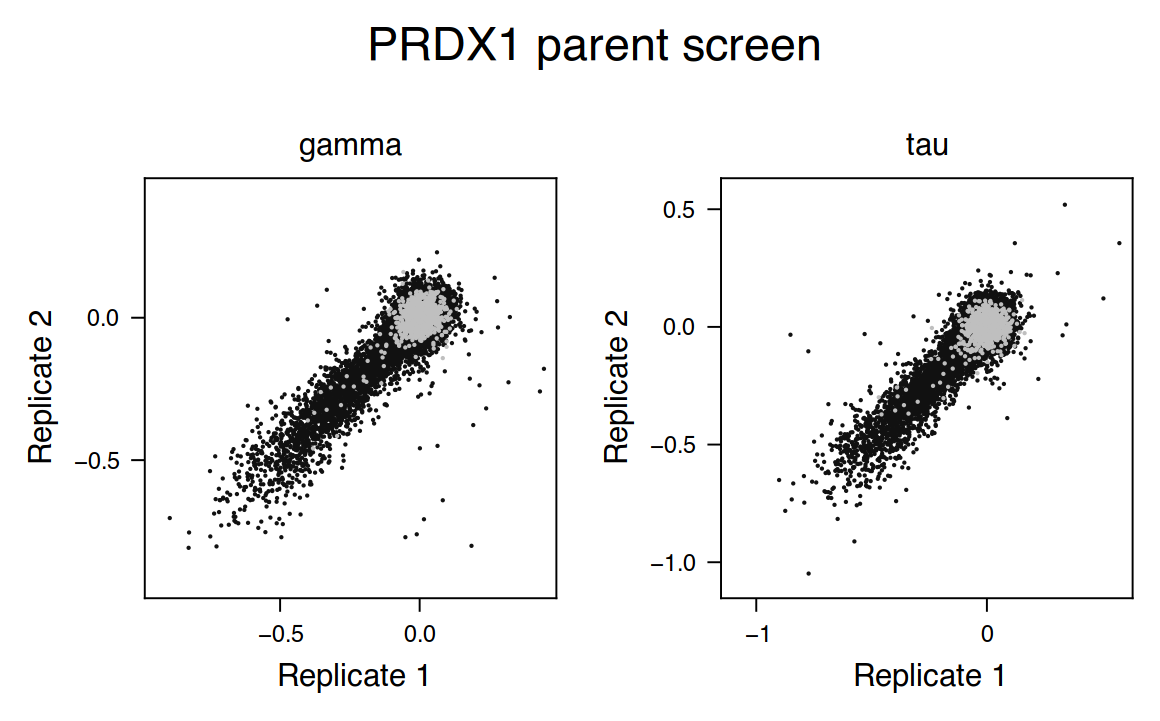

In [37]:
fig3

#### count norm

In [38]:
fig4 = plot_count_norm(screen_parent, title='PRDX1 parent screen')

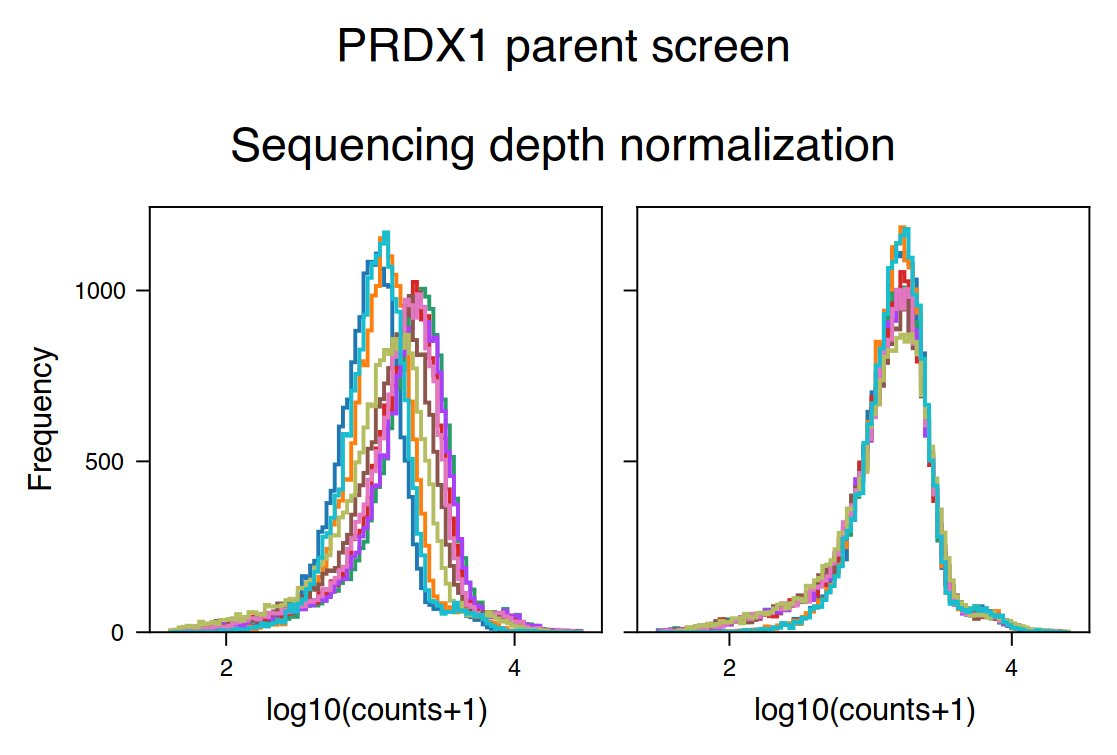

In [39]:
fig4

#### volcano plots

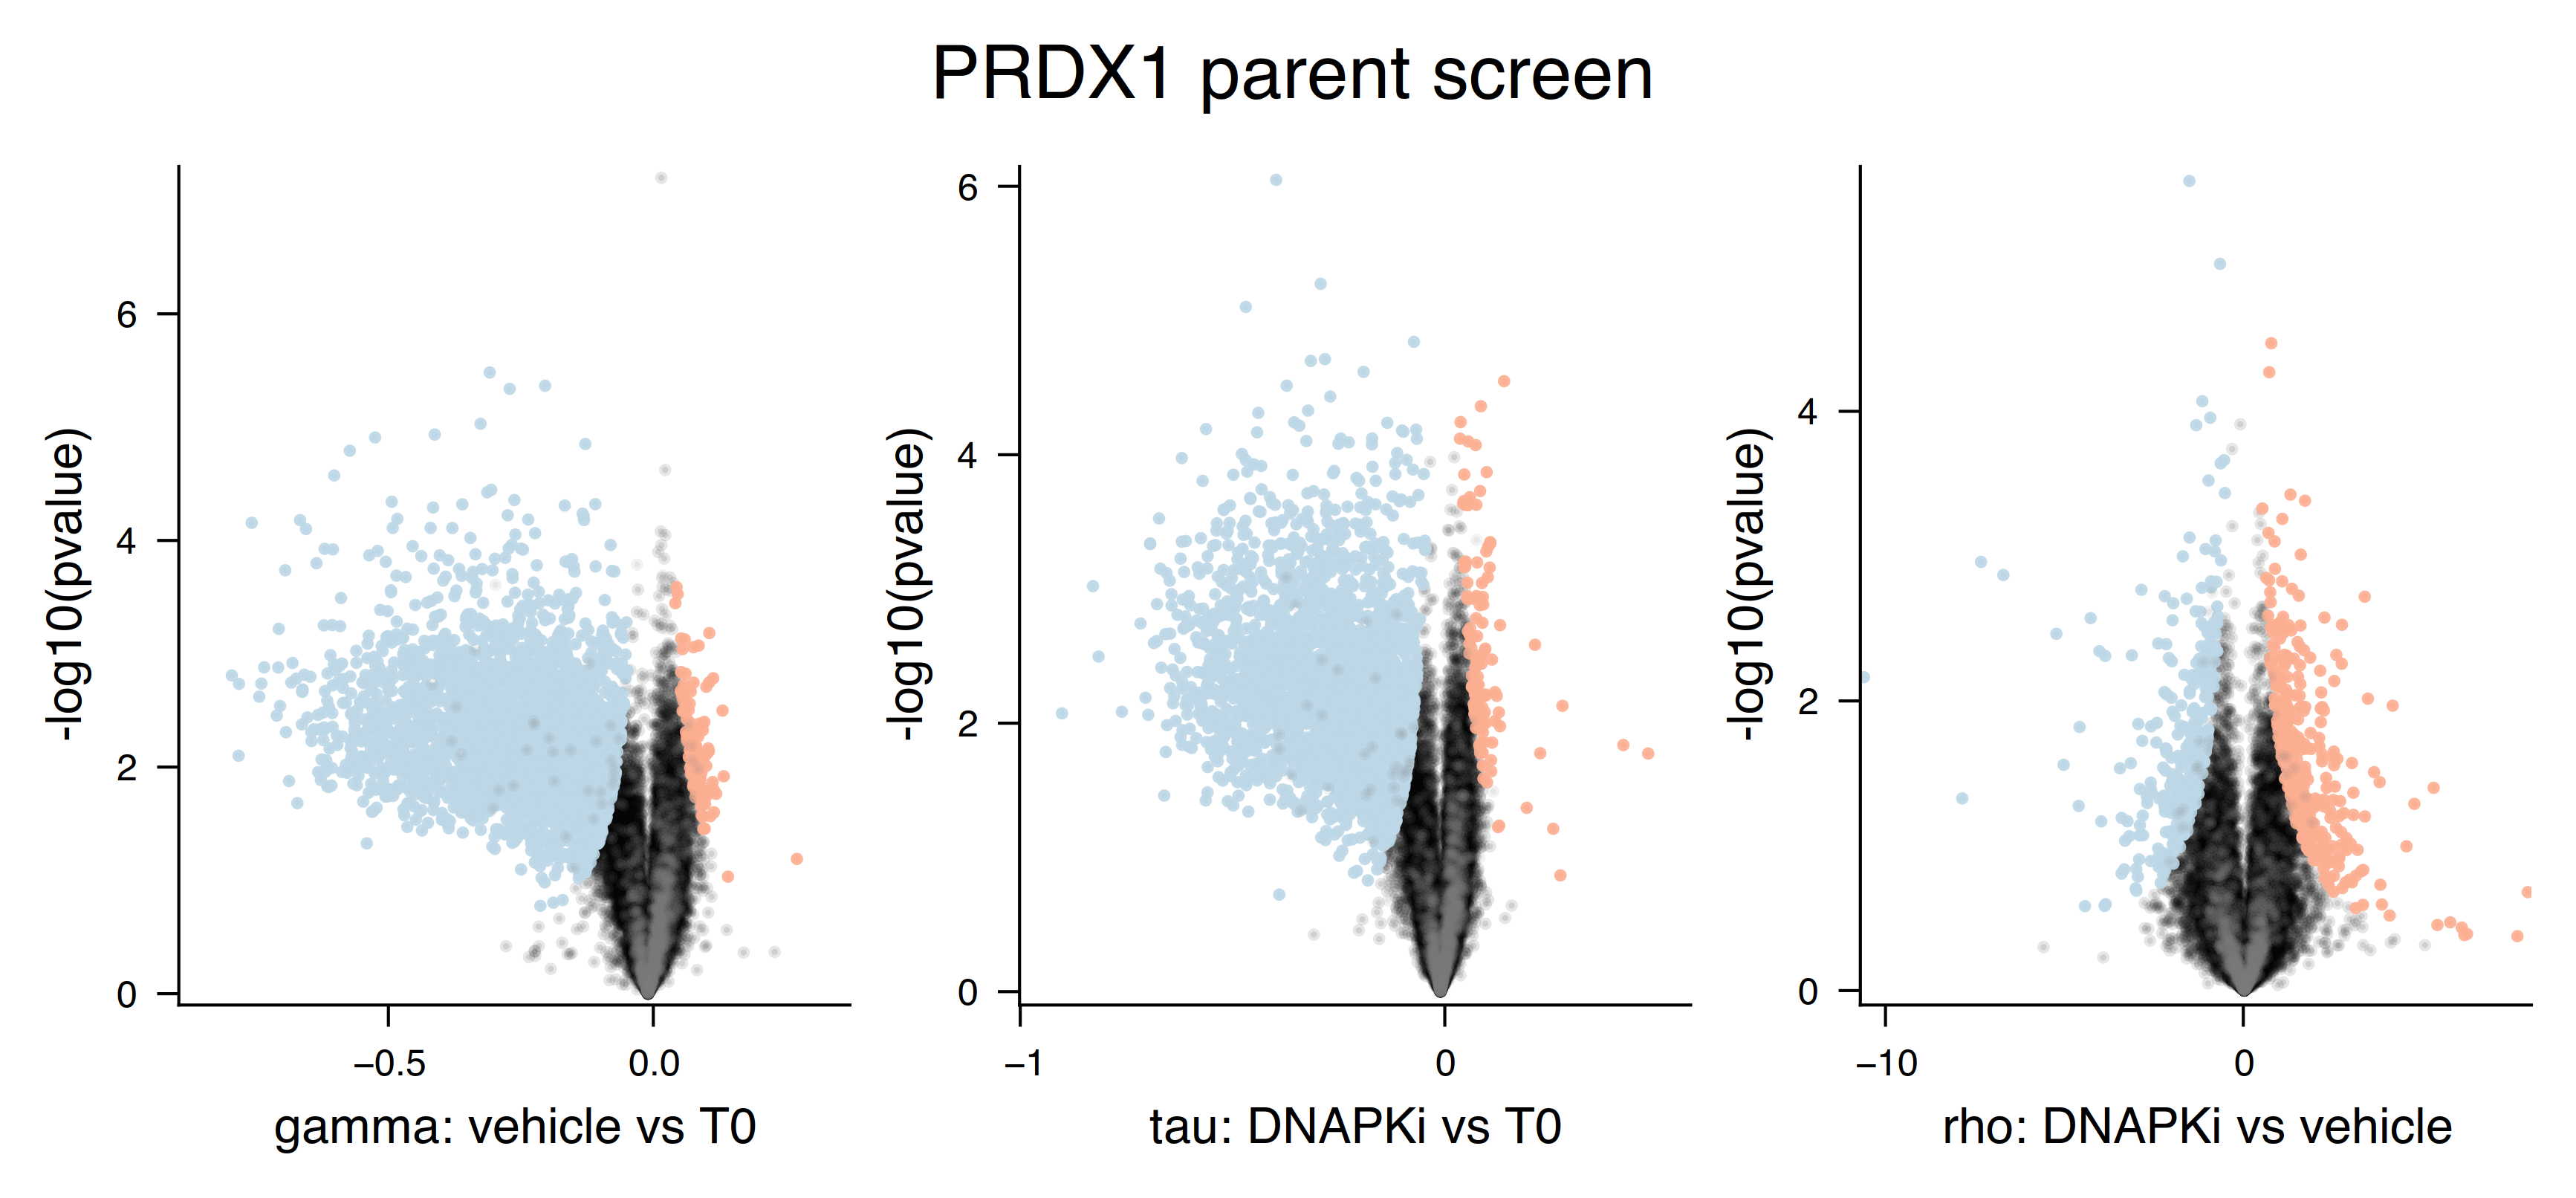

In [40]:
fig5 = plot_volcanos(screen_parent, title='PRDX1 parent screen')

fig5

In [41]:
rho = screen_parent.getPhenotypeScores('rho:DNAPKi_vs_vehicle',10, pvalue_col='ttest pvalue')

fig, ax = plt.subplots(figsize=(1, 2))

scp.pl._rank.rank_plot(
    rho, 
    # 'combined_score', 
    'score', 
    ax=ax, dot_size=1, ylabel='Combined Score', 
    title='parent screen\nrho:DNAPKi_vs_vehicle'
)

ax.grid(False)
ax.tick_params(width=0.5)
for i in ax.spines.values(): i.set_linewidth(0.5)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(8)
for item in ax.get_xticklabels() + ax.get_yticklabels():
    item.set_fontsize(6)

# plt.savefig('rank_plot.pdf')
plt.show()

/home/abea/miniconda3/envs/screenpro2/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


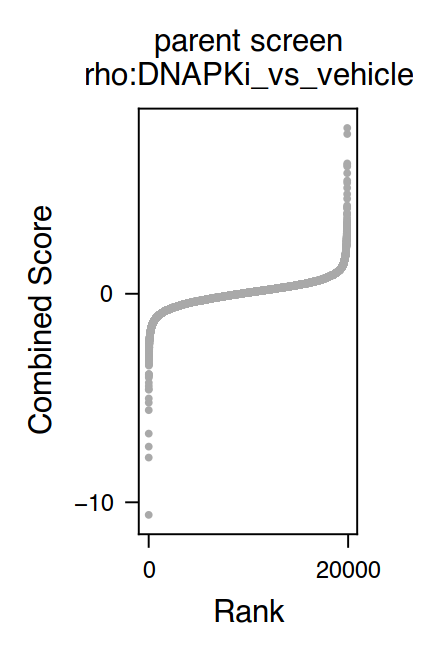

In [42]:
fig

### PRDX1 KO screen

In [43]:
screen_PRDX1KO = run_pipeline(adata_PRDX1KO)


43840 variables with less than 40 reads (filter_type: 'all')
Pseudocount added to counts.
Counts normalized by sequencing depth.
	vehicle vs T0


	DNAPKi vs T0
	DNAPKi vs vehicle


#### replicate level scores

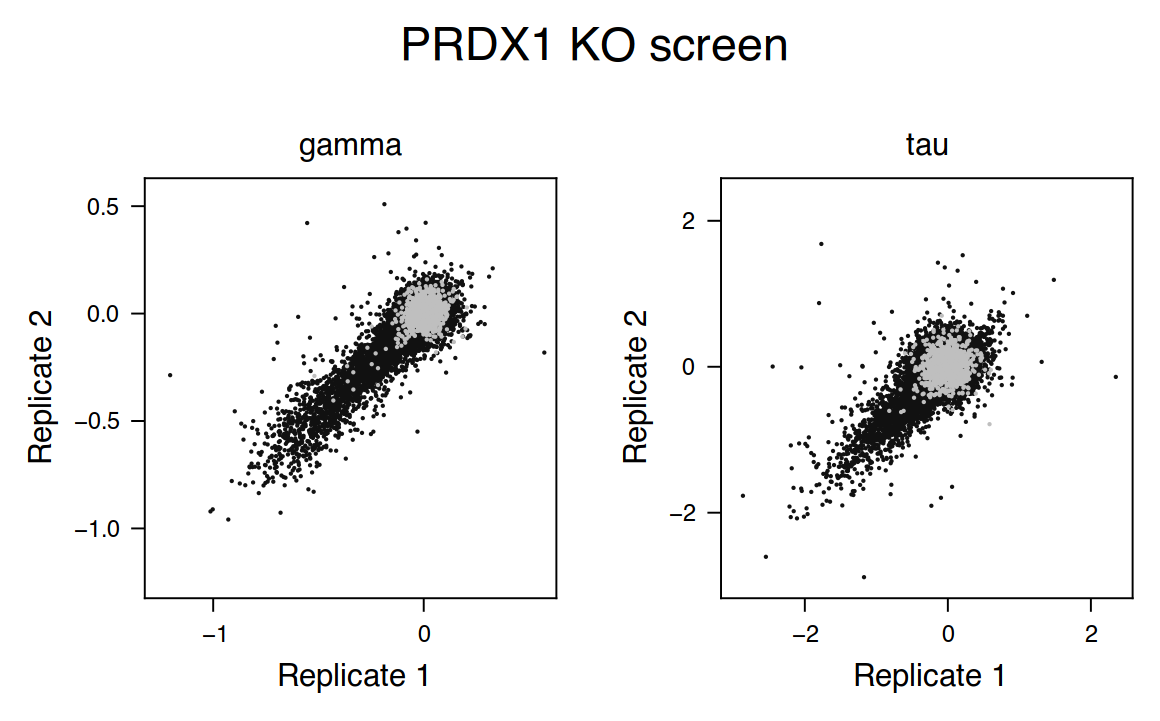

In [44]:
fig6 = plot_score_scatters(
    screen_PRDX1KO, 
    title='PRDX1 KO screen',
)

fig6

#### count norm

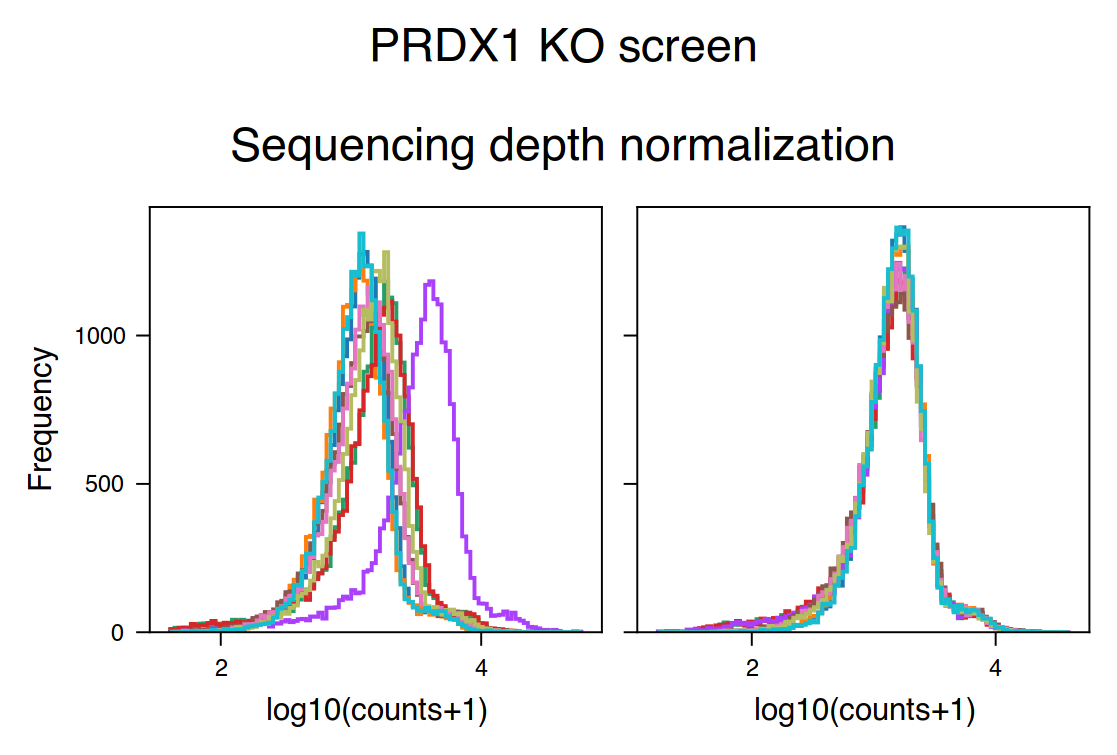

In [45]:
fig7 = plot_count_norm(screen_PRDX1KO, title='PRDX1 KO screen')

fig7

#### volcano plots

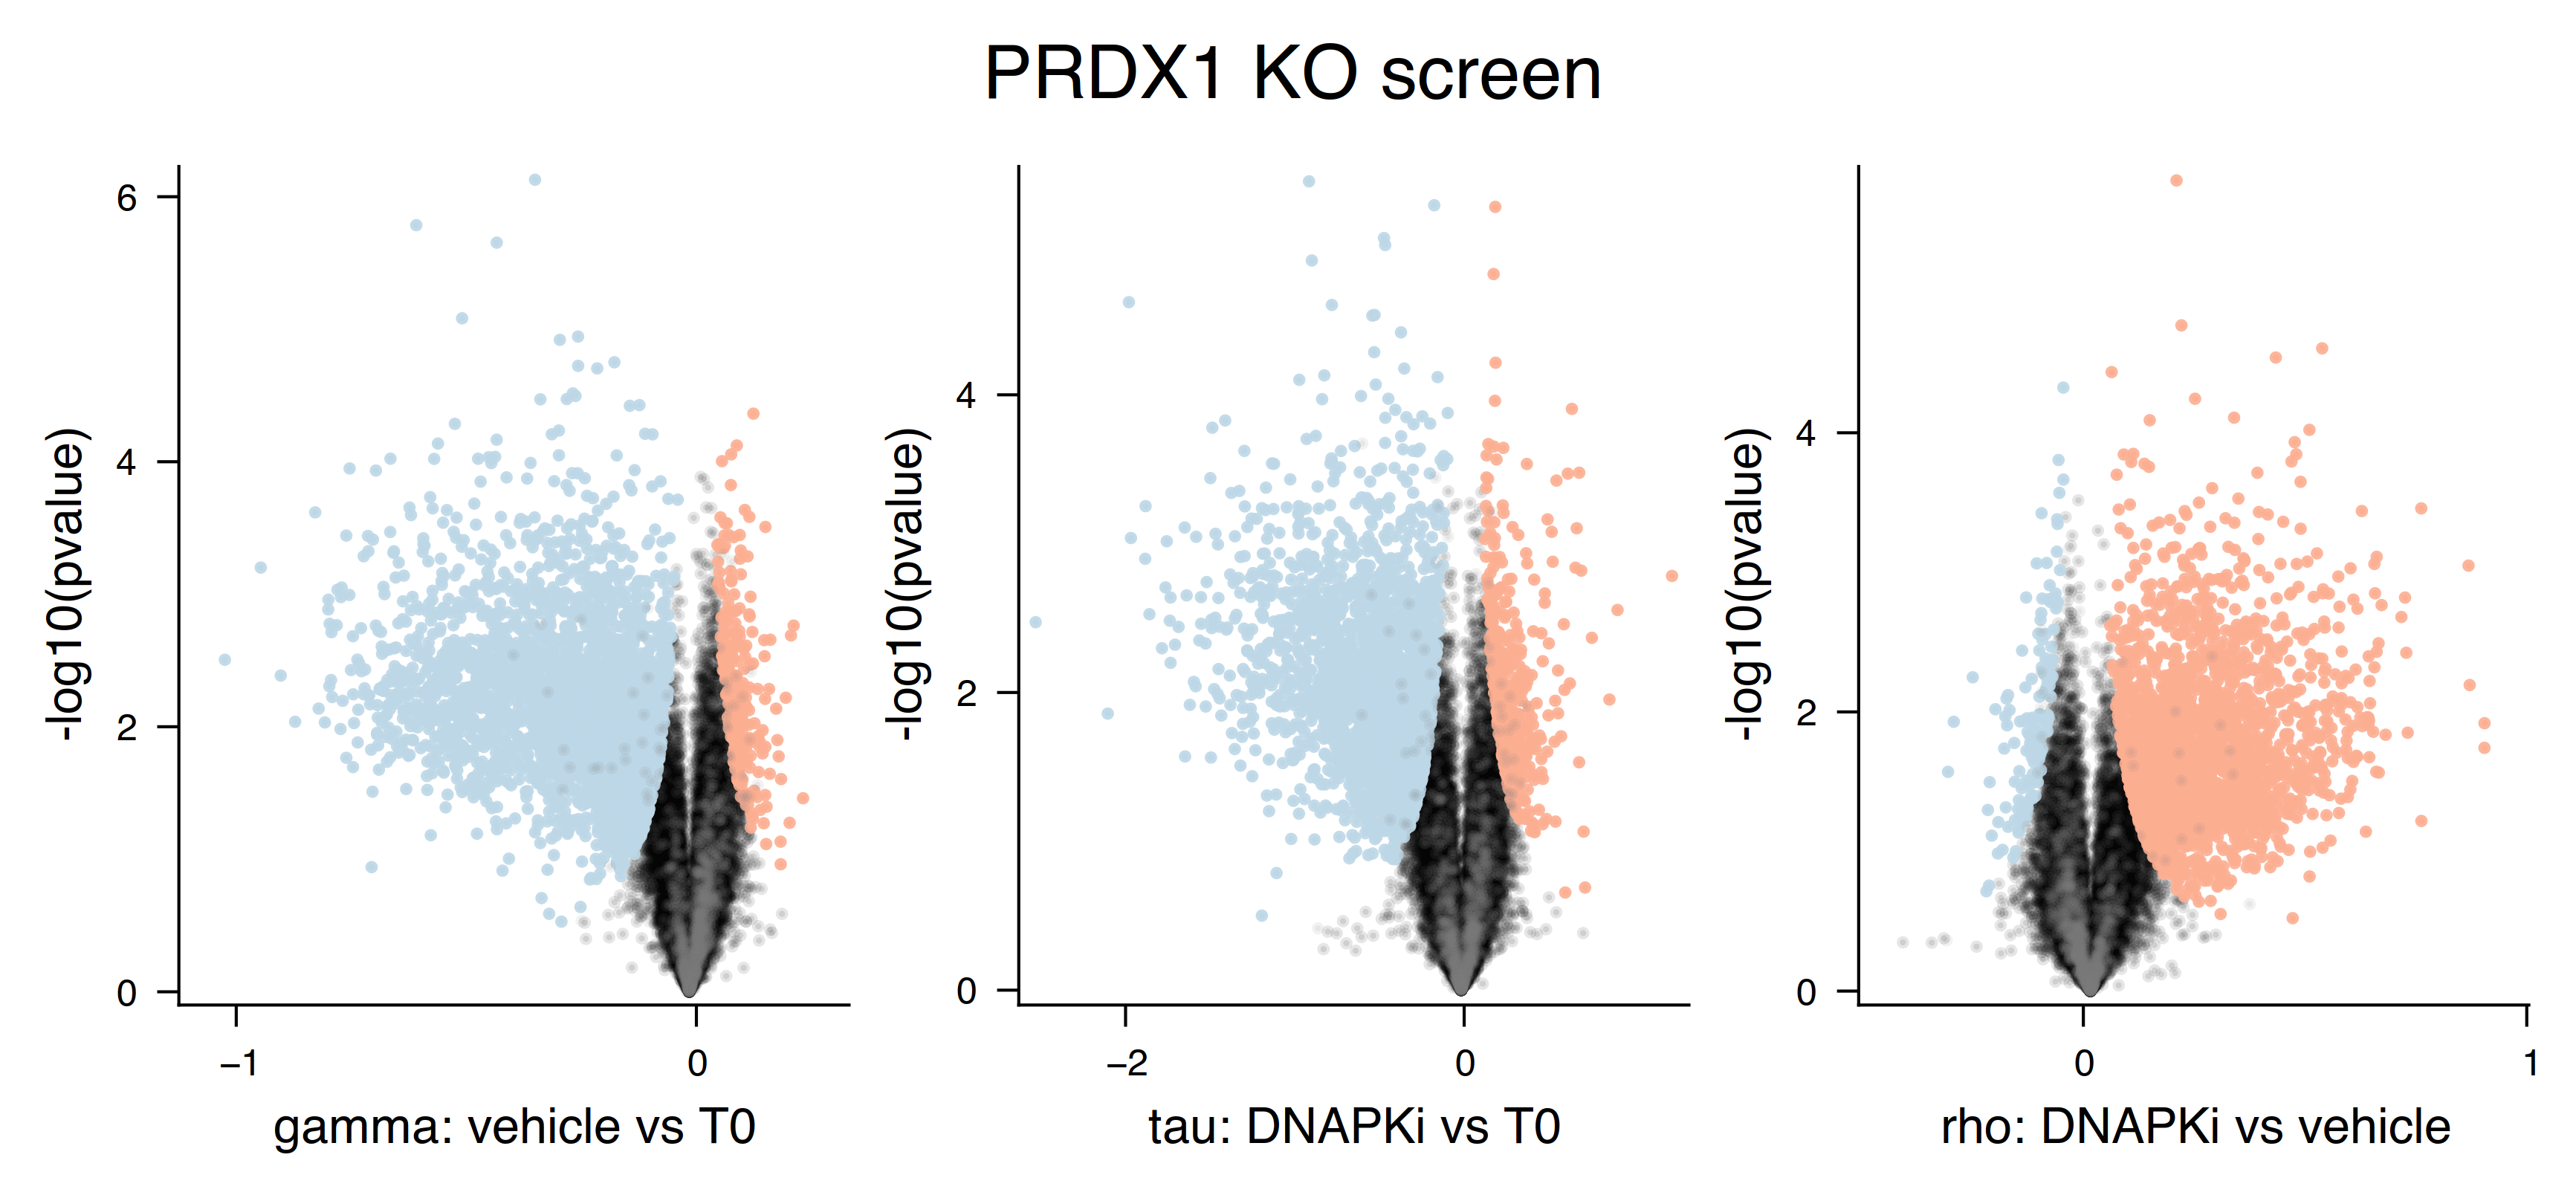

In [46]:
fig8 = plot_volcanos(screen_PRDX1KO, title='PRDX1 KO screen')

fig8

### adata_vehicle

In [47]:
screen_vehicle = run_pipeline(adata_vehicle, untreated='parent', treated='PRDX1KO')

44224 variables with less than 40 reads (filter_type: 'all')
Pseudocount added to counts.
Counts normalized by sequencing depth.
	parent vs T0
	PRDX1KO vs T0


	PRDX1KO vs parent


#### replicate level scores

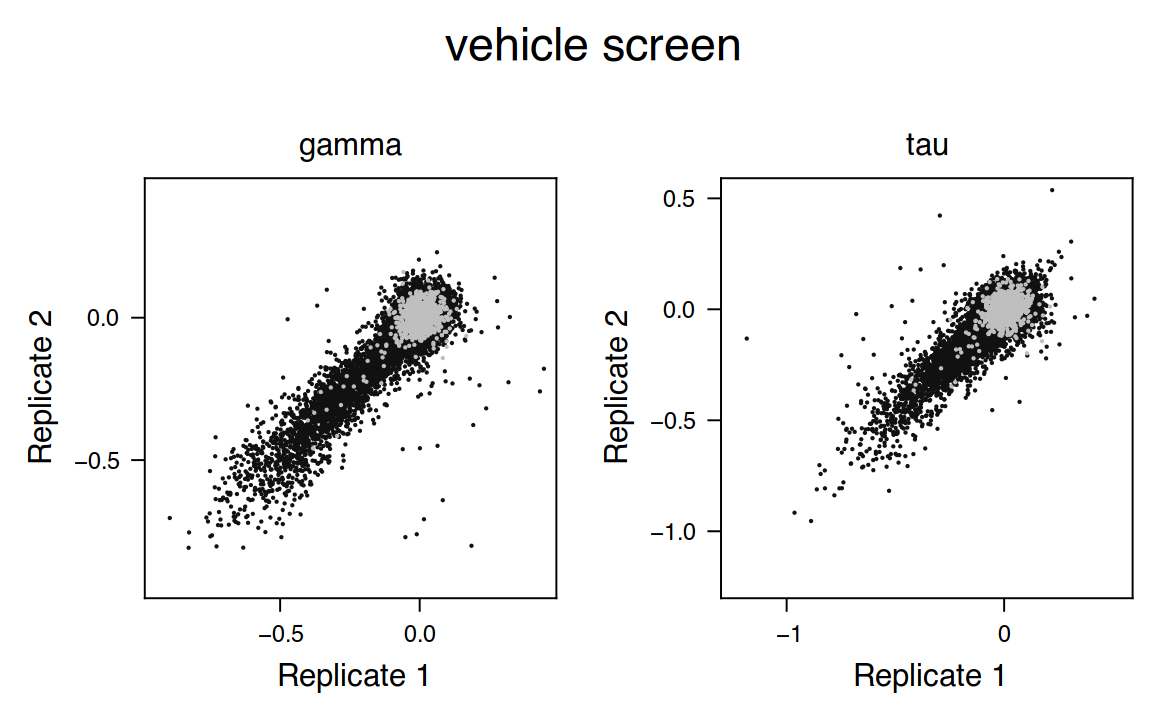

In [48]:
fig9 = plot_score_scatters(
    screen_vehicle,
    treated='PRDX1KO',
    untreated='parent',
    title='vehicle screen'
)

fig9

#### count norm

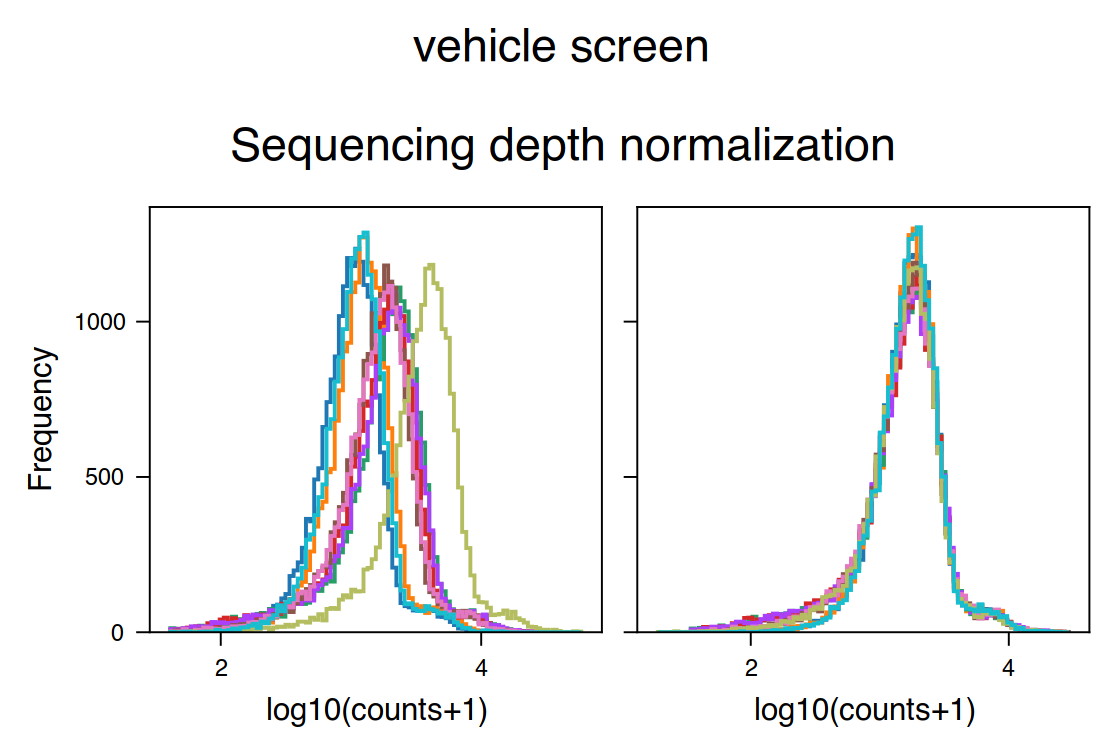

In [49]:
fig10 = plot_count_norm(screen_vehicle, title='vehicle screen')

fig10

#### volcano plots

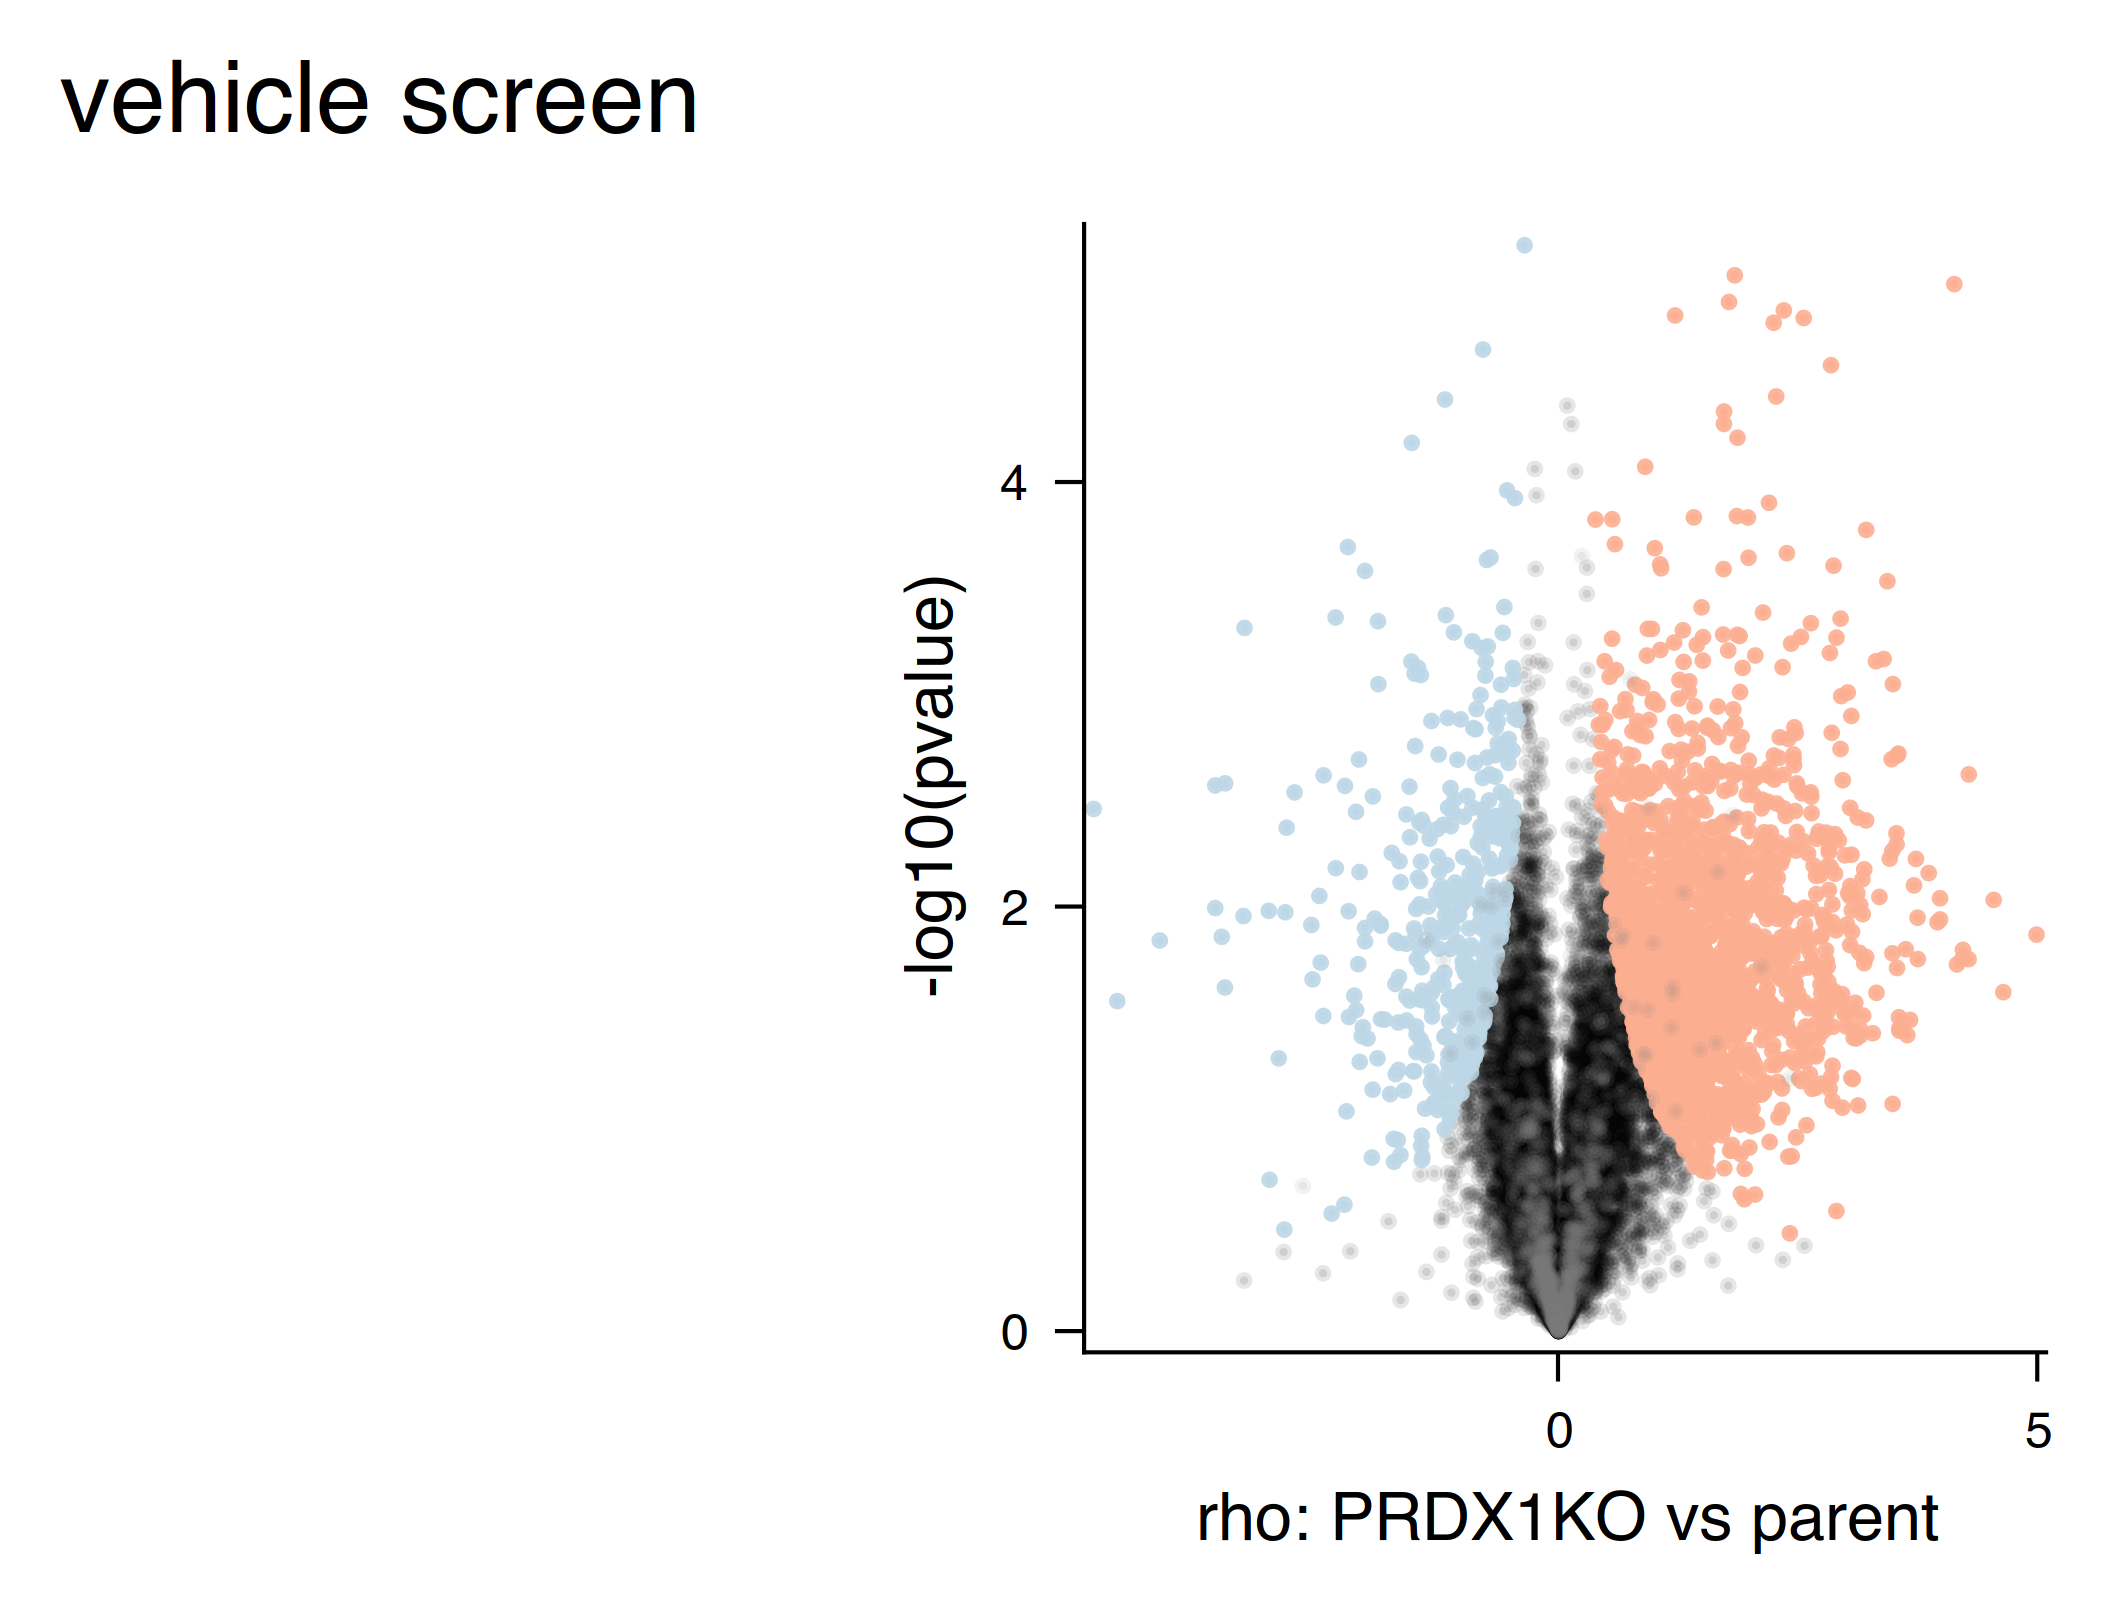

In [50]:
fig11 = plot_volcanos(screen_vehicle, title='vehicle screen', score_names=['rho'])

fig11

# 

In [51]:
# screen_parent.getAnnotatedTable(threshold=2)['rho:DNAPKi_vs_vehicle'].groupby('label').size()

In [52]:
# screen_PRDX1KO.getAnnotatedTable(threshold=2)['rho:DNAPKi_vs_vehicle'].groupby('label').size()

In [53]:
# screen_vehicle.getAnnotatedTable(threshold=2)['rho:PRDX1KO_vs_parent'].groupby('label').size()

### save to file

In [54]:
screen = scp.PooledScreens(adata, verbose=True)

screen.countNormalization()

Pseudocount added to counts.
Counts normalized by sequencing depth.


In [55]:
screen.phenotypes['compare_reps_parent'] = screen_parent.phenotypes['compare_reps']
screen.phenotypes['compare_reps_PRDX1KO'] = screen_PRDX1KO.phenotypes['compare_reps']
screen.phenotypes['compare_reps_vehicle'] = screen_vehicle.phenotypes['compare_reps']

In [56]:
scp.load._write_screen_pkl(screen, 'A549_PRDX1_CRISPRi_v3_screens')

Object successfully saved to "A549_PRDX1_CRISPRi_v3_screens.pkl"


___

In [57]:
import datetime
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages('../plots/CRISPRi-PRDX1-DDRi-screens.pdf') as pdf:
    for fig in [fig1,fig2,fig3,fig4,fig5,fig6,fig7,fig8,fig9,fig10,fig11]:
        pdf.savefig(fig)  # saves the current figure into a pdf page

    d = pdf.infodict()
    d['Title'] = 'ScreenPro2 plots'
    d['ModDate'] = datetime.datetime.today()

#### 

In [58]:
%reload_ext watermark

In [59]:
%watermark

Last updated: 2024-09-23T17:35:26.236684-07:00

Python implementation: CPython
Python version       : 3.11.9
IPython version      : 8.27.0

Compiler    : GCC 11.2.0
OS          : Linux
Release     : 5.15.0-119-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 64
Architecture: 64bit



In [60]:
%watermark --iversions

screenpro : 0.4.15
pandas    : 1.5.3
anndata   : 0.10.9
matplotlib: 3.6.2
numpy     : 1.26.4
scanpy    : 1.10.3



___